<a href="https://colab.research.google.com/github/MAristyaP/PCVK_Genap_2021/blob/main/Week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Make a Gamma Correction according to the following instructions
This experiment will ask you to make a Gamma Correction. In this experiment, the Gamma value
will be set by asking for input from the user . Below is the code to request value input from the
user. Continue the code by creating an image with gamma correction according to the formula
given.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


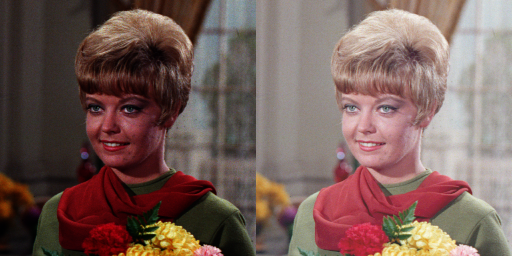

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np


print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
      gamma_image[y,x] = 255 * ((original[y,x] / 255) ** (1/gamma))


final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

2. Create Image Depth Simulation
This experiment is used as a simulation of the image quantization process. In image
quantization, pixels can be represented by n-bit depth (default is 8-bit). In an 8-bit pixel,
the possible colors are 256 colors, from 0 (0000 0000) to 255 (1111 1111). On a 7-bit pixel,
the possible colors are 128 colors, from 0 (000 0000) to 127 (111 1111). The possible color
is obtained from the power of 2 the number of bits. If it is 7 bits, then the number of colors
will be 2 7 = 128, etc. Since Visual Studio 2017 only works on 8 bits, this experiment only
manipulates colors so that the number of colors matches their depth. For the 7-bit case,
two 8-bit colors are represented by one 7-bit color. Examples of color pixels 0 and 1 at 8-
bit, represented by color 0 at 7-bit. color pixels 2 and 3 at 8-bit, represented by color 1 at
7-bit, etc.

In [3]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/Images/male.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)


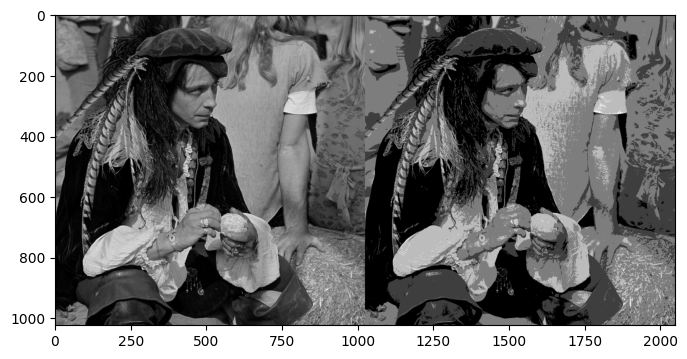

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

original = cv.imread('/content/drive/MyDrive/Images/male.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

bit_depth=2

level = 255/(2**bit_depth)-1

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = np.clip(round(original[y,x]/level) * level, 0, 255)

# Menampilkan gambar
plt.figure(figsize=(8, 6))

# Menggabungkan gambar asli dan depth_image
combined_image = np.concatenate((original, depth_image), axis=1)

# Menampilkan gambar gabungan
plt.imshow(combined_image, cmap='gray', vmin=0, vmax=255)
plt.axis('on')

plt.show()

3. Create the Average Denoising module
Create an average denoising module according to the formula given in the previous section.
Original images are provided at /images/galaxy.jpg .
100 Images with Gaussian Noise are provided at /images/noises/*.jpg
You can use the following code to read all the images in one folder, use the glob module (
import glob ).

Nilai PSNR adalah 27.53743916156828 (dB)


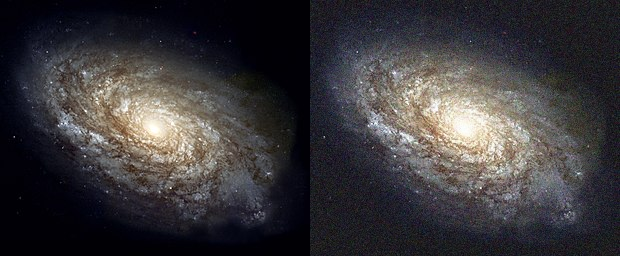

In [5]:
# 1. Number in average = 5

import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)



def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.52086505776816 (dB)


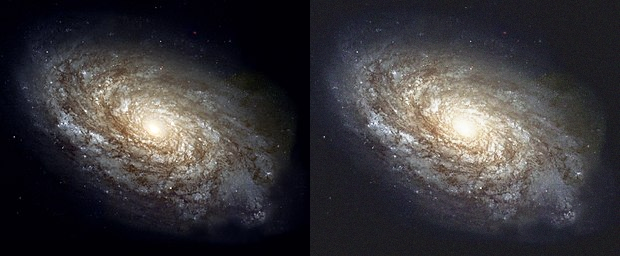

In [6]:
# 2. Number in average = 30

dst = cv_img[0]
noise_number = 29
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.485757638732142 (dB)


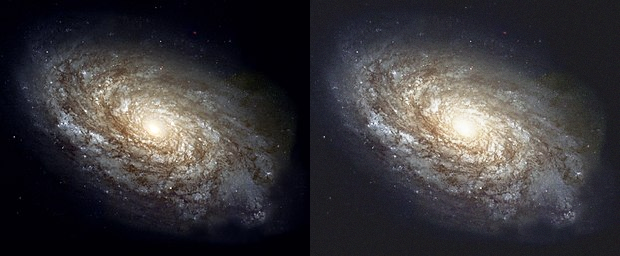

In [7]:
# 3. Number in average = 60

dst = cv_img[0]
noise_number = 59
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.507500880013627 (dB)


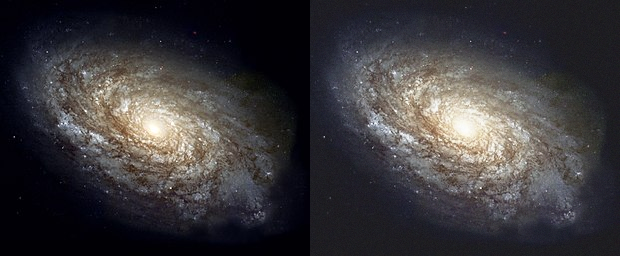

In [8]:
# 4. Number in average = 80

dst = cv_img[0]
noise_number = 79
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.518003238591472 (dB)


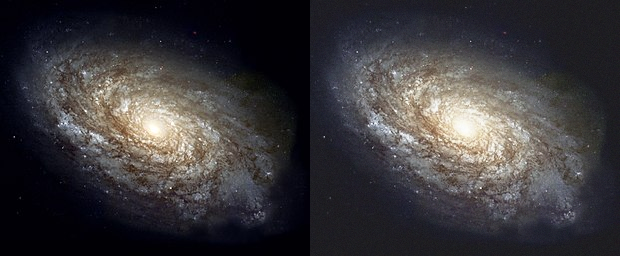

In [9]:
# 5. Number in average = 100

dst = cv_img[0]
noise_number = 99
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

4. Create a masking image for the following image. The left image is the original image (images/teeth),

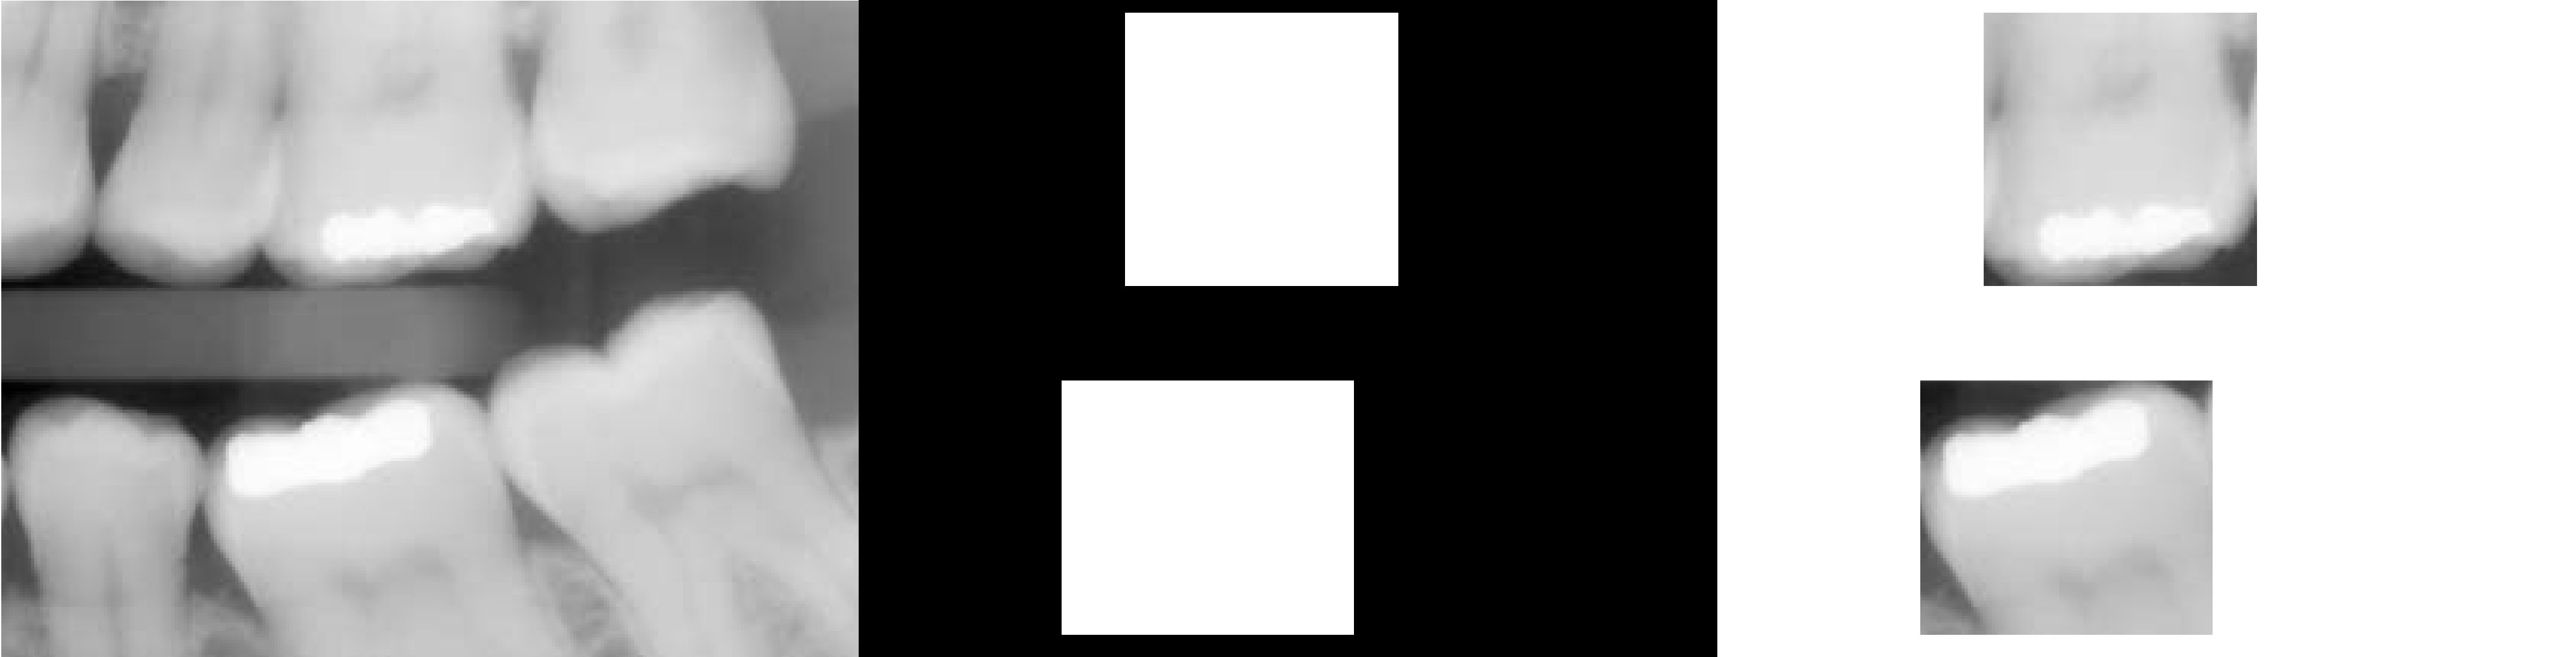

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


couple_image = cv2.imread('/content/drive/MyDrive/Images/teeth.jpg')

mask = np.zeros(couple_image.shape, dtype=np.uint8)

mask = cv2.rectangle(mask, (420, 20), (850, 450), (255, 255, 255), thickness=-1)

mask = cv2.rectangle(mask, (320, 1000), (780, 600), (255, 255, 255), thickness=-1)


result_image = couple_image & mask


result_image[np.where((result_image == [0,0,0]).all(axis=2))] = [255,255,255]

couple_frame = cv.hconcat([couple_image, mask, result_image])
cv2_imshow(couple_frame)

A. OR

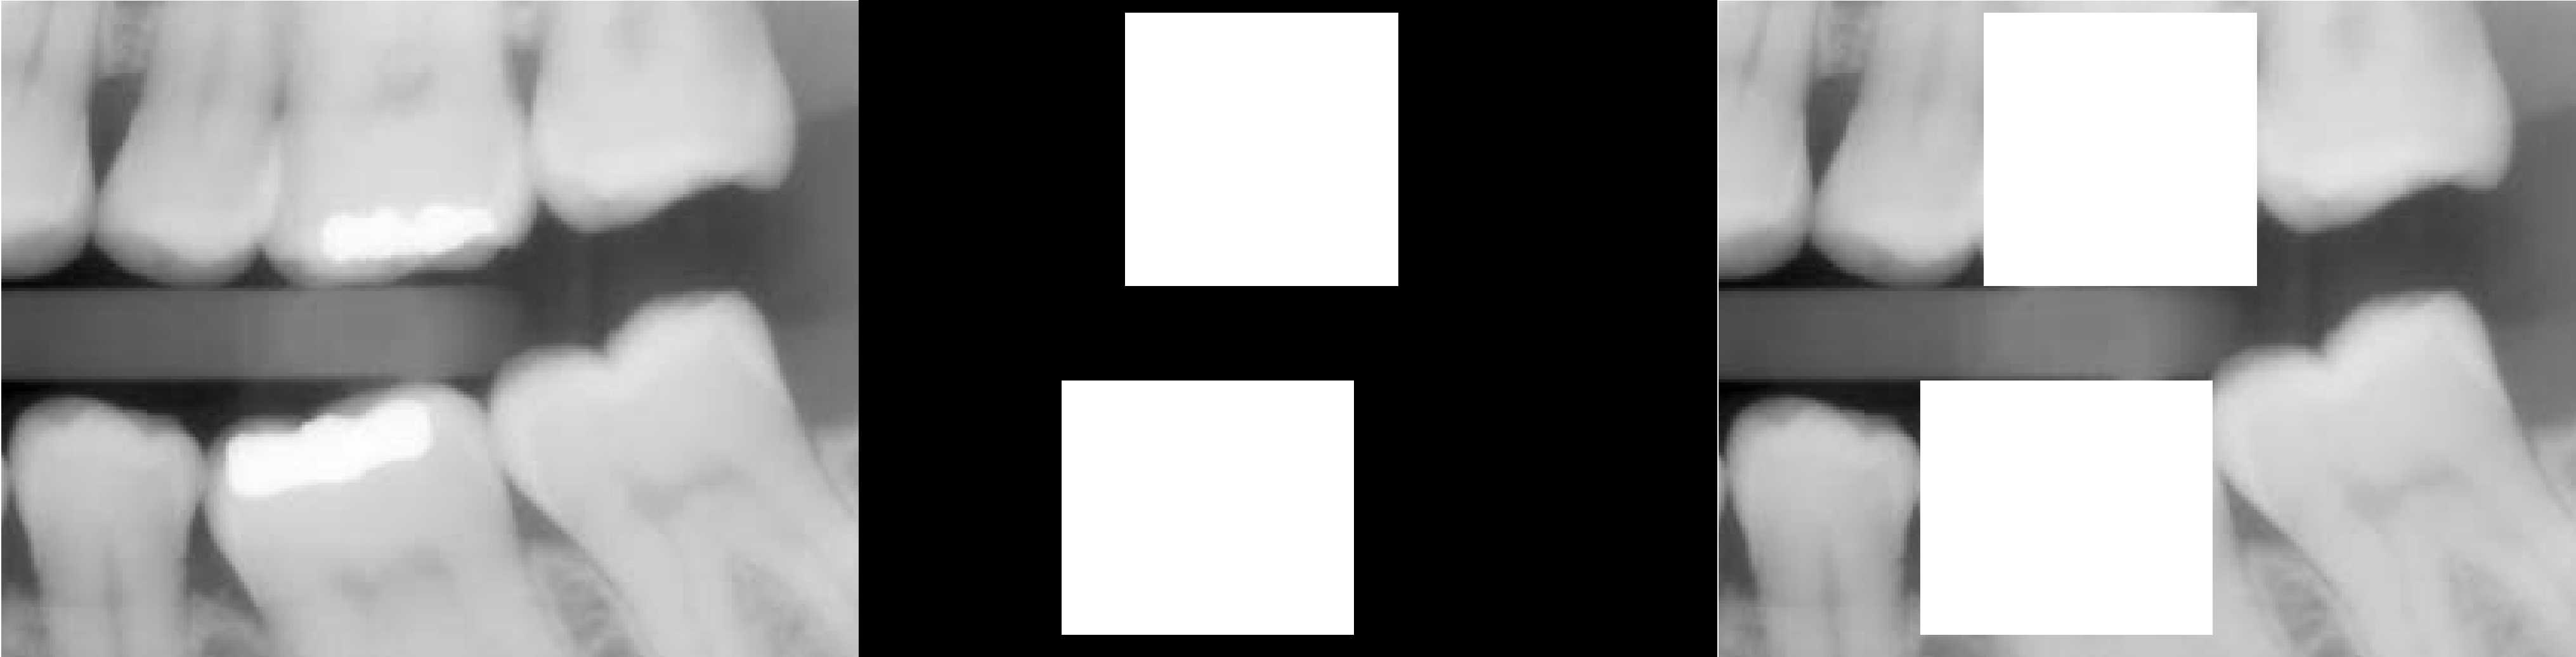

In [11]:
import cv2
import numpy as np

couple_image = cv2.imread('/content/drive/MyDrive/Images/teeth.jpg')

mask = np.zeros(couple_image.shape, dtype=np.uint8)

mask = cv2.rectangle(mask, (420, 20), (850, 450), (255, 255, 255), thickness=-1)

mask = cv2.rectangle(mask, (320, 1000), (780, 600), (255, 255, 255), thickness=-1)

result_image = couple_image | mask

couple_frame = cv.hconcat([couple_image, mask, result_image])
cv2_imshow(couple_frame)

B. NOT

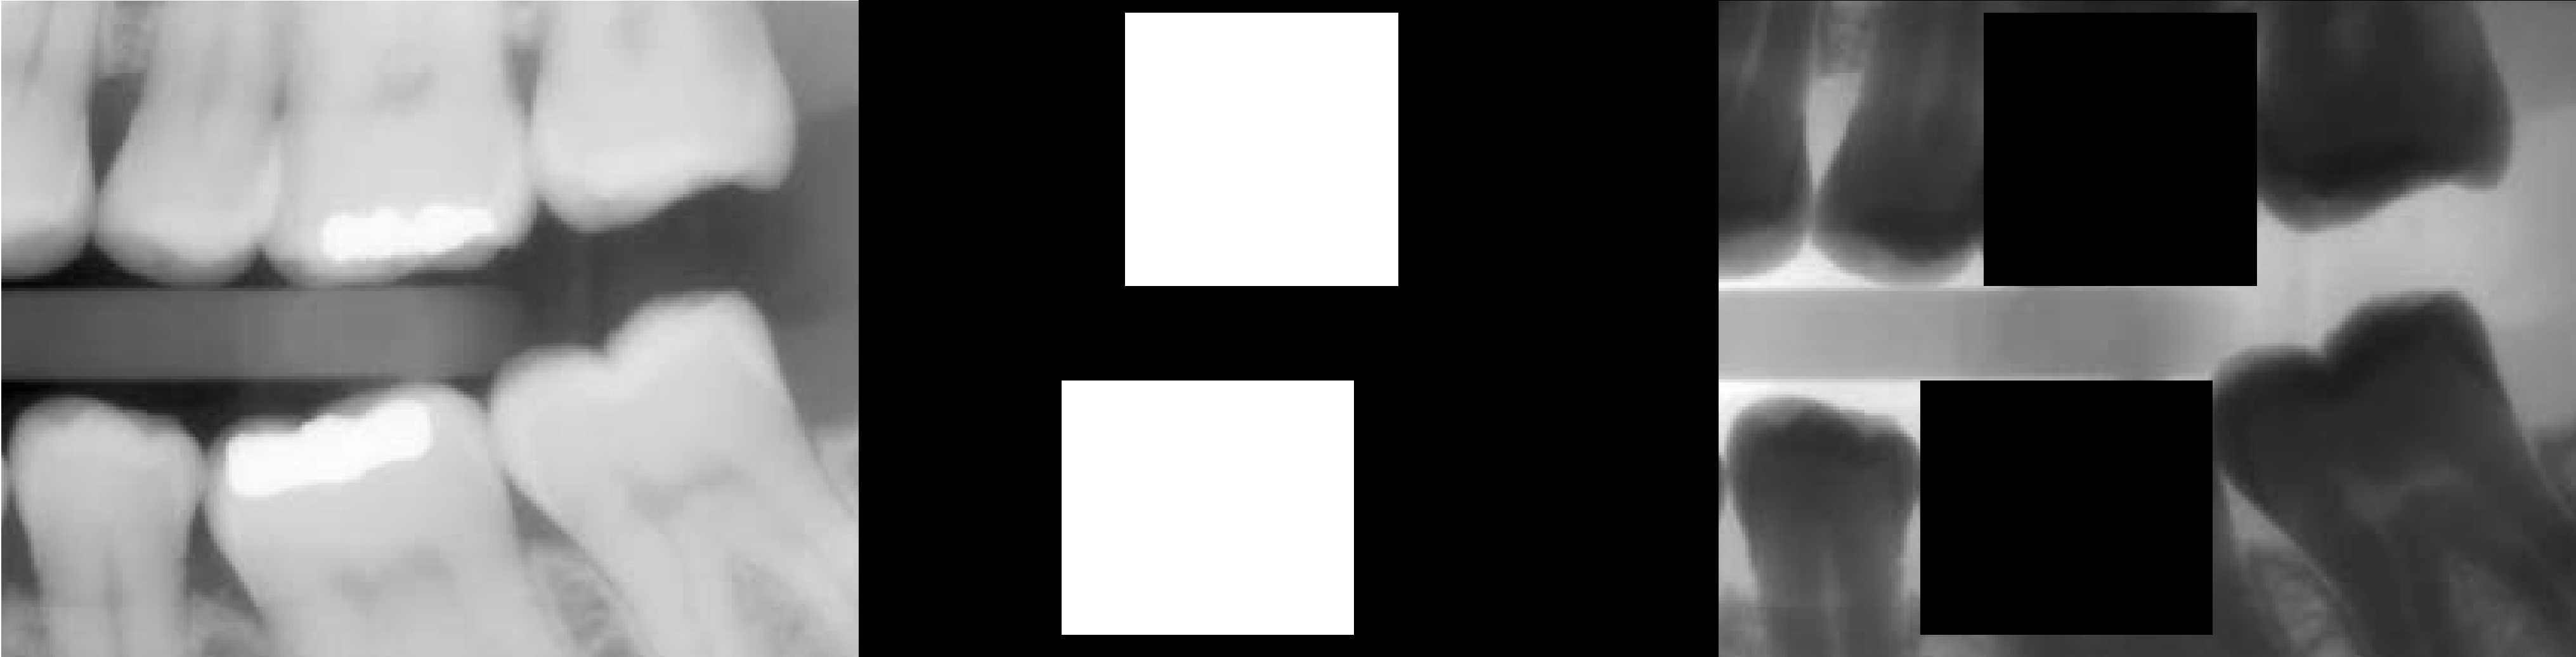

In [12]:
import cv2
import numpy as np


couple_image = cv2.imread('/content/drive/MyDrive/Images/teeth.jpg')

mask = np.zeros(couple_image.shape, dtype=np.uint8)

mask = cv2.rectangle(mask, (420, 20), (850, 450), (255, 255, 255), thickness=-1)

mask = cv2.rectangle(mask, (320, 1000), (780, 600), (255, 255, 255), thickness=-1)

result_image = ~couple_image & ~mask

couple_frame = cv.hconcat([couple_image, mask, result_image])
cv2_imshow(couple_frame)

C. NAND

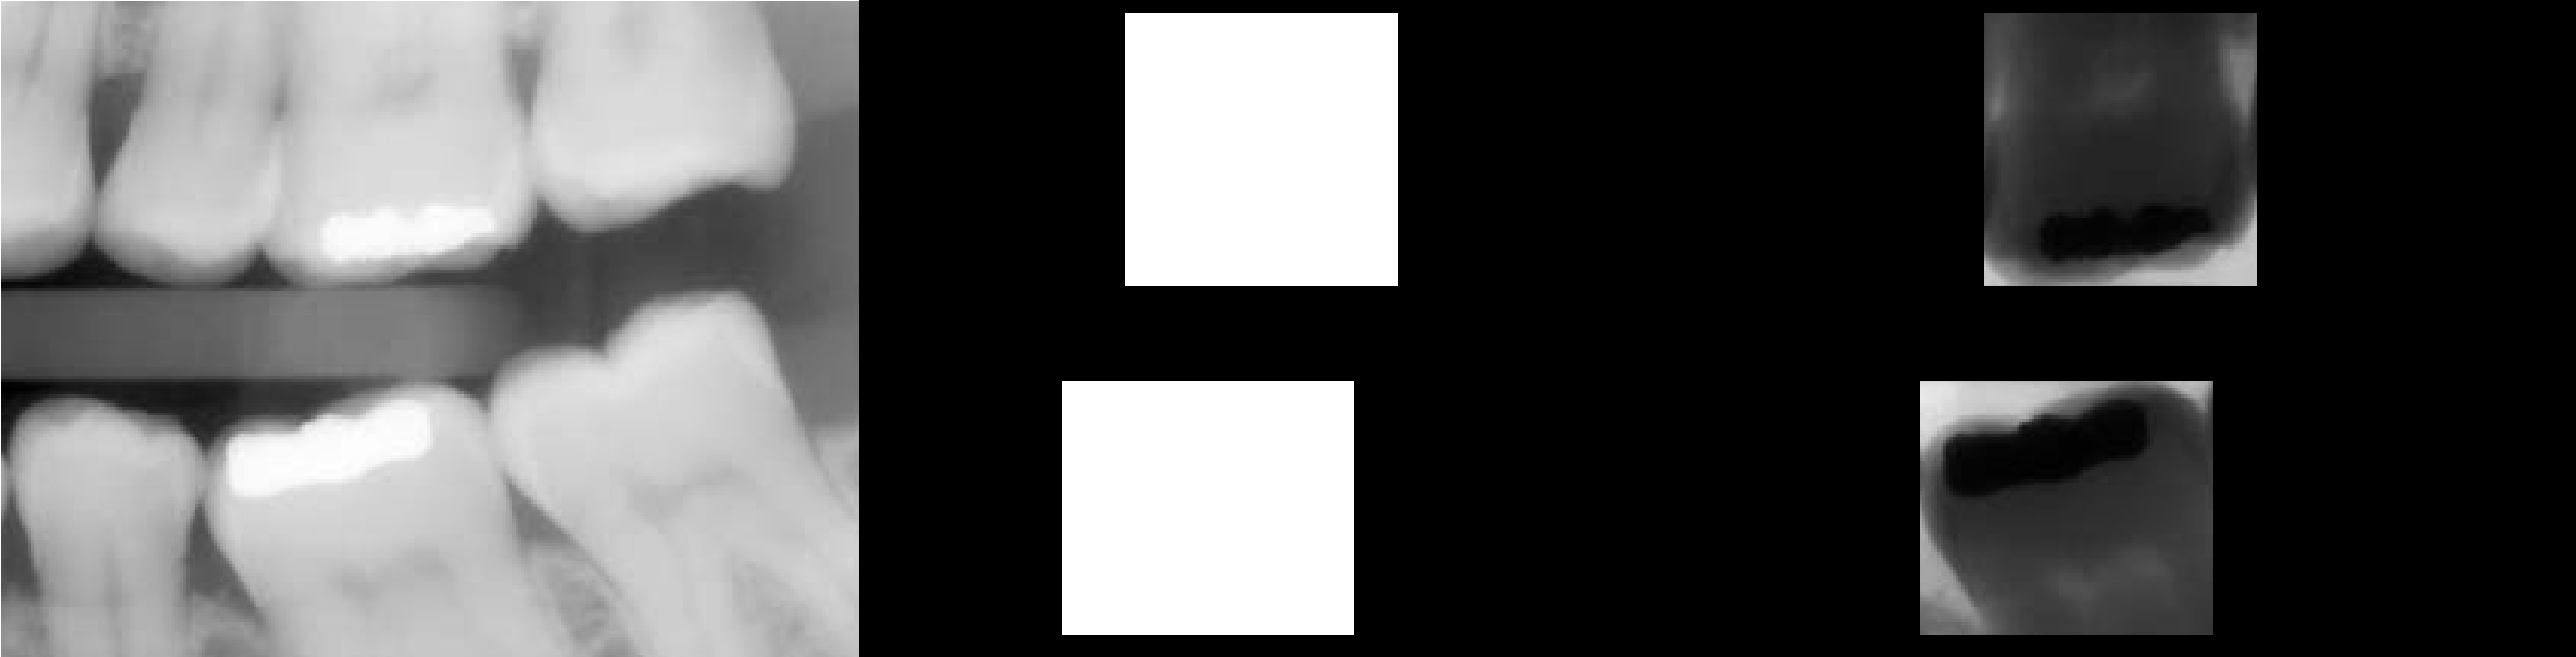

In [13]:
import cv2
import numpy as np


couple_image = cv2.imread('/content/drive/MyDrive/Images/teeth.jpg')

mask = np.zeros(couple_image.shape, dtype=np.uint8)

mask = cv2.rectangle(mask, (420, 20), (850, 450), (255, 255, 255), thickness=-1)

mask = cv2.rectangle(mask, (320, 1000), (780, 600), (255, 255, 255), thickness=-1)

result_image = ~couple_image & mask

couple_frame = cv.hconcat([couple_image, mask, result_image])
cv2_imshow(couple_frame)

D. XOR

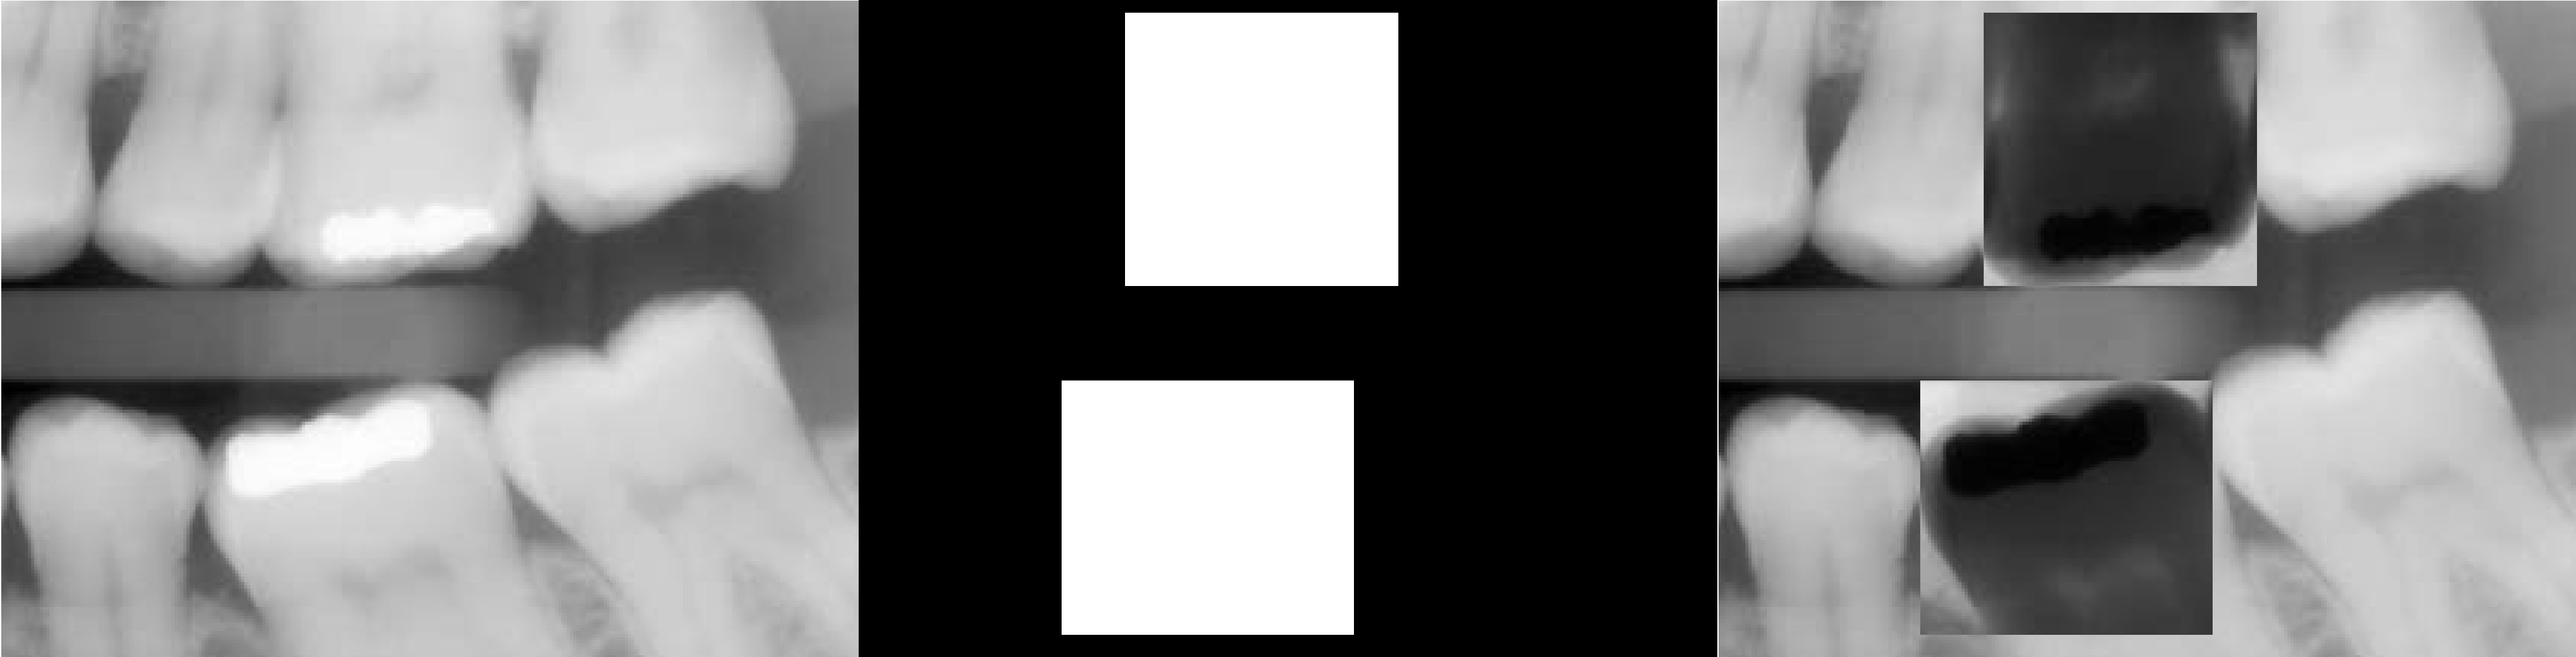

In [14]:
import cv2
import numpy as np

couple_image = cv2.imread('/content/drive/MyDrive/Images/teeth.jpg')

mask = np.zeros(couple_image.shape, dtype=np.uint8)

mask = cv2.rectangle(mask, (420, 20), (850, 450), (255, 255, 255), thickness=-1)

mask = cv2.rectangle(mask, (320, 1000), (780, 600), (255, 255, 255), thickness=-1)

result_image = couple_image ^ mask

couple_frame = cv.hconcat([couple_image, mask, result_image])
cv2_imshow(couple_frame)